# 1. Import Libraries and Load Data

First, I'll import all the necessary libraries like pandas, seaborn, and scikit-learn.

Then, I'll download the "Adult Income" dataset from the UCI repository and load it into a pandas DataFrame with the correct column names.

In [1]:
!pip install jupyter-dash

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 57.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 65.2 MB/s eta 0:00:00


In [2]:
# --- 1. Import Libraries ---
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import joblib  # For saving the model and scaler

# For model building
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')


# --- 2. Download and Load Data ---
# Download the standard "Adult Income" dataset from the reliable UCI repository
!wget "https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data" -O adult.csv

# Define the correct column names
column_names = [
    'age', 'workclass', 'fnlwgt', 'education', 'educational-num', 'marital-status',
    'occupation', 'relationship', 'race', 'gender', 'capital-gain', 'capital-loss',
    'hours-per-week', 'native-country', 'income'
]

# Load the dataset, specifying header=None and handling the ' ?' as NaN
df = pd.read_csv('adult.csv', header=None, names=column_names, na_values=' ?')

# Display the first 5 rows
print("Data loaded successfully:")
df.head()

--2025-11-08 15:43:07--  https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified
Saving to: ‘adult.csv’

adult.csv               [    <=>             ]   3.79M  4.02MB/s    in 0.9s    

2025-11-08 15:43:09 (4.02 MB/s) - ‘adult.csv’ saved [3974305]

Data loaded successfully:


,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


# 2. Data Cleaning and Preprocessing

The dataset contains missing values (marked as `?`). I'll drop all rows with missing data to create a clean dataset.

Next, I'll separate the data into features (`X`) and the target variable (`y`). I'll also encode the target `y` (changing `<=50K` and `>50K` to `0` and `1`) and One-Hot Encode all the text-based feature columns.

In [3]:
# --- 3. Clean and Preprocess Data ---

# Check for missing values (which we loaded as NaN)
print("Missing values before drop:")
print(df.isnull().sum())

# Drop rows with any missing values
df.dropna(inplace=True)

# Reset the index
df.reset_index(drop=True, inplace=True)

print("\nMissing values after drop:")
print(df.isnull().sum())

# --- 4. Separate Features (X) and Target (y) ---
X = df.drop('income', axis=1)
y = df['income']

# --- 5. Encode Target (y) and Features (X) ---

# Encode the target variable 'y' (<=50K -> 0, >50K -> 1)
y = LabelEncoder().fit_transform(y)

# Find which columns are categorical (text)
categorical_cols = X.select_dtypes(include=['object']).columns

# Use get_dummies to One-Hot Encode the categorical features
X = pd.get_dummies(X, columns=categorical_cols, drop_first=True)

# Display the new processed X
print("\nProcessed feature data (X):")
X.head()

Missing values before drop:
age                   0
workclass          1836
fnlwgt                0
education             0
educational-num       0
marital-status        0
occupation         1843
relationship          0
race                  0
gender                0
capital-gain          0
capital-loss          0
hours-per-week        0
native-country      583
income                0
dtype: int64

Missing values after drop:
age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64

Processed feature data (X):


,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week,workclass_ Local-gov,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,...,native-country_ Portugal,native-country_ Puerto-Rico,native-country_ Scotland,native-country_ South,native-country_ Taiwan,native-country_ Thailand,native-country_ Trinadad&Tobago,native-country_ United-States,native-country_ Vietnam,native-country_ Yugoslavia
0,39,77516,13,2174,0,40,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
1,50,83311,13,0,0,13,False,False,False,True,...,False,False,False,False,False,False,False,True,False,False
2,38,215646,9,0,0,40,False,True,False,False,...,False,False,False,False,False,False,False,True,False,False
3,53,234721,7,0,0,40,False,True,False,False,...,False,False,False,False,False,False,False,True,False,False
4,28,338409,13,0,0,40,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False


# 3. Exploratory Data Analysis (EDA) - Distributions

Now I'll visualize the data. These first plots show the distribution of key features like Age, the overall Income Class, and Education Level.

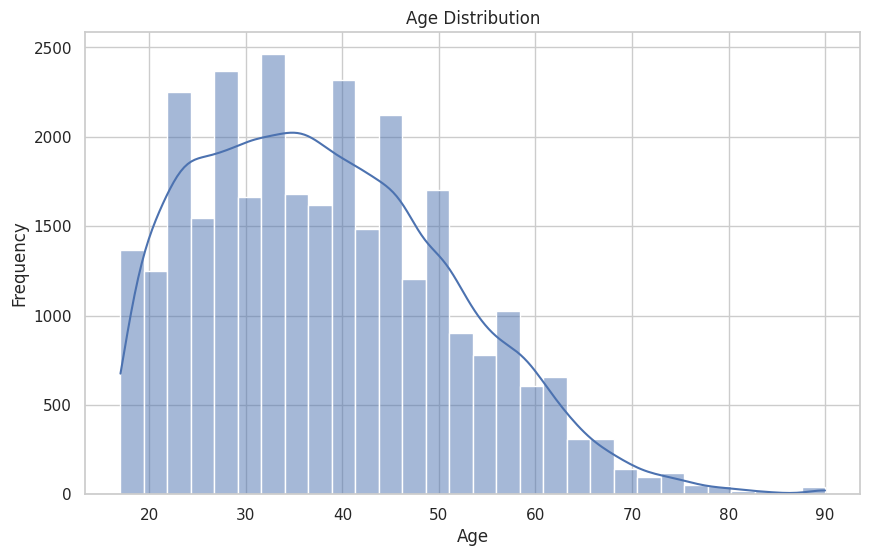

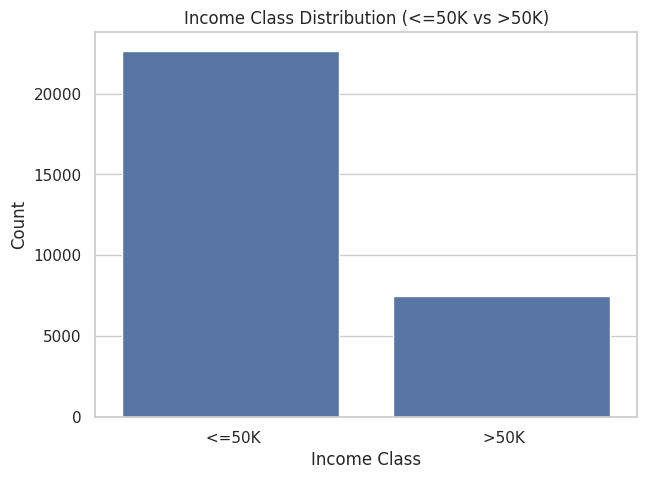

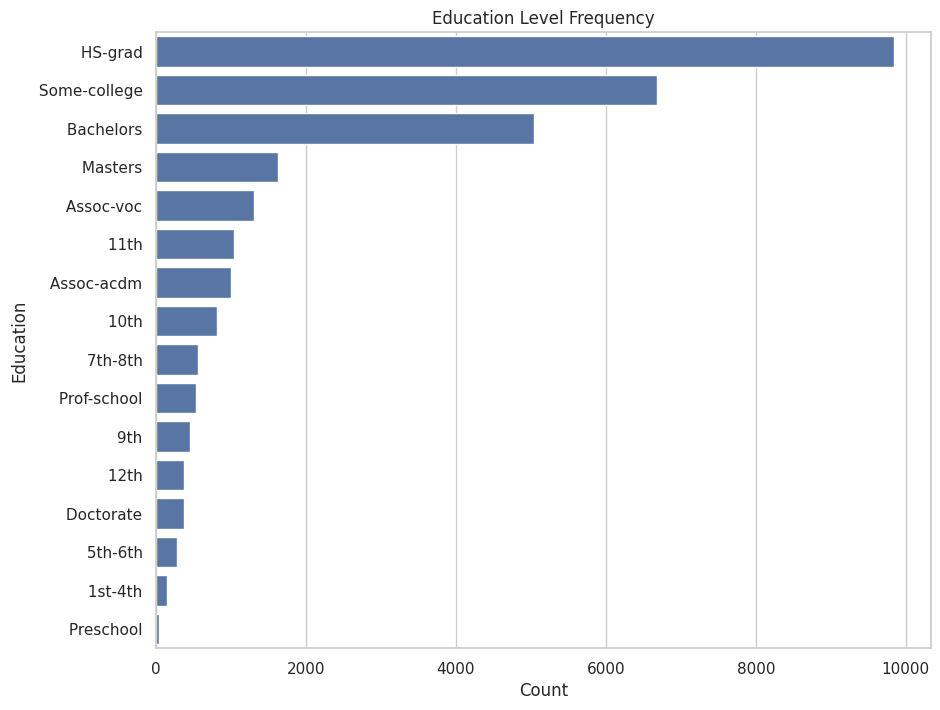

In [4]:
# --- 6. Exploratory Data Analysis (EDA) ---

# Set the style
sns.set(style="whitegrid")

# Plot Age Distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['age'], bins=30, kde=True)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

# Plot Income Class Distribution
# We use the original 'df' here to plot the text labels
plt.figure(figsize=(7, 5))
sns.countplot(x='income', data=df)
plt.title('Income Class Distribution (<=50K vs >50K)')
plt.xlabel('Income Class')
plt.ylabel('Count')
plt.show()

# Plot Education Level Frequency
plt.figure(figsize=(10, 8))
sns.countplot(y='education', data=df, order=df['education'].value_counts().index)
plt.title('Education Level Frequency')
plt.xlabel('Count')
plt.ylabel('Education')
plt.show()

# 4. EDA - Feature Relationships

These boxplots help to visualize the relationship between key features (like Age, Education, and Hours per Week) and the final income class.

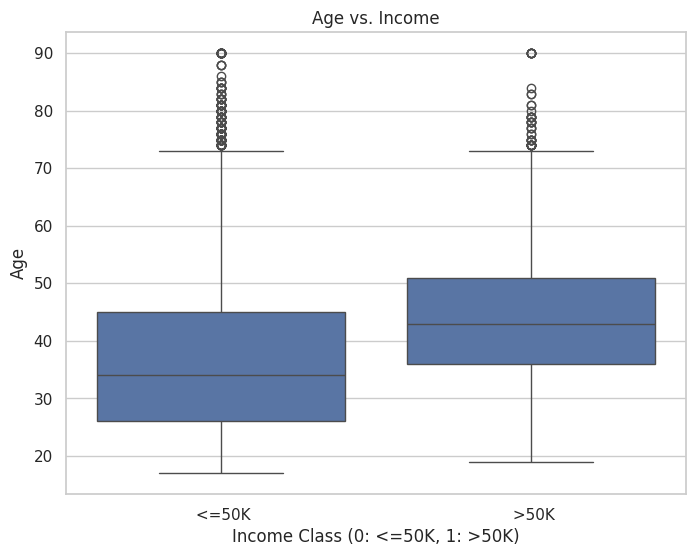

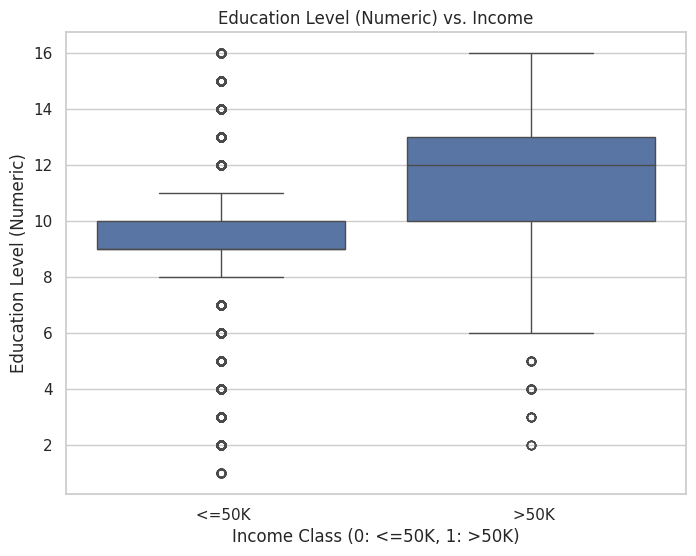

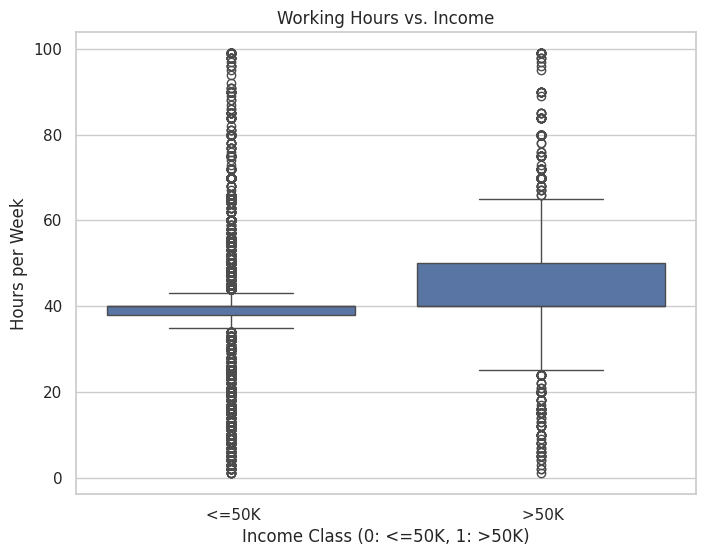

In [5]:
# --- 7. EDA (Relationships) ---

# Plot Age vs Income
plt.figure(figsize=(8, 6))
sns.boxplot(x='income', y='age', data=df)
plt.title('Age vs. Income')
plt.xlabel('Income Class (0: <=50K, 1: >50K)')
plt.ylabel('Age')
plt.show()

# Plot Education vs Income
plt.figure(figsize=(8, 6))
sns.boxplot(x='income', y='educational-num', data=df)
plt.title('Education Level (Numeric) vs. Income')
plt.xlabel('Income Class (0: <=50K, 1: >50K)')
plt.ylabel('Education Level (Numeric)')
plt.show()

# Plot Hours per Week vs Income
plt.figure(figsize=(8, 6))
sns.boxplot(x='income', y='hours-per-week', data=df)
plt.title('Working Hours vs. Income')
plt.xlabel('Income Class (0: <=50K, 1: >50K)')
plt.ylabel('Hours per Week')
plt.show()

# 5. EDA - Correlation Heatmap

This heatmap shows the correlation between all the numeric features. It's too dense to read individual features, but it gives a good overview of the data's complexity.

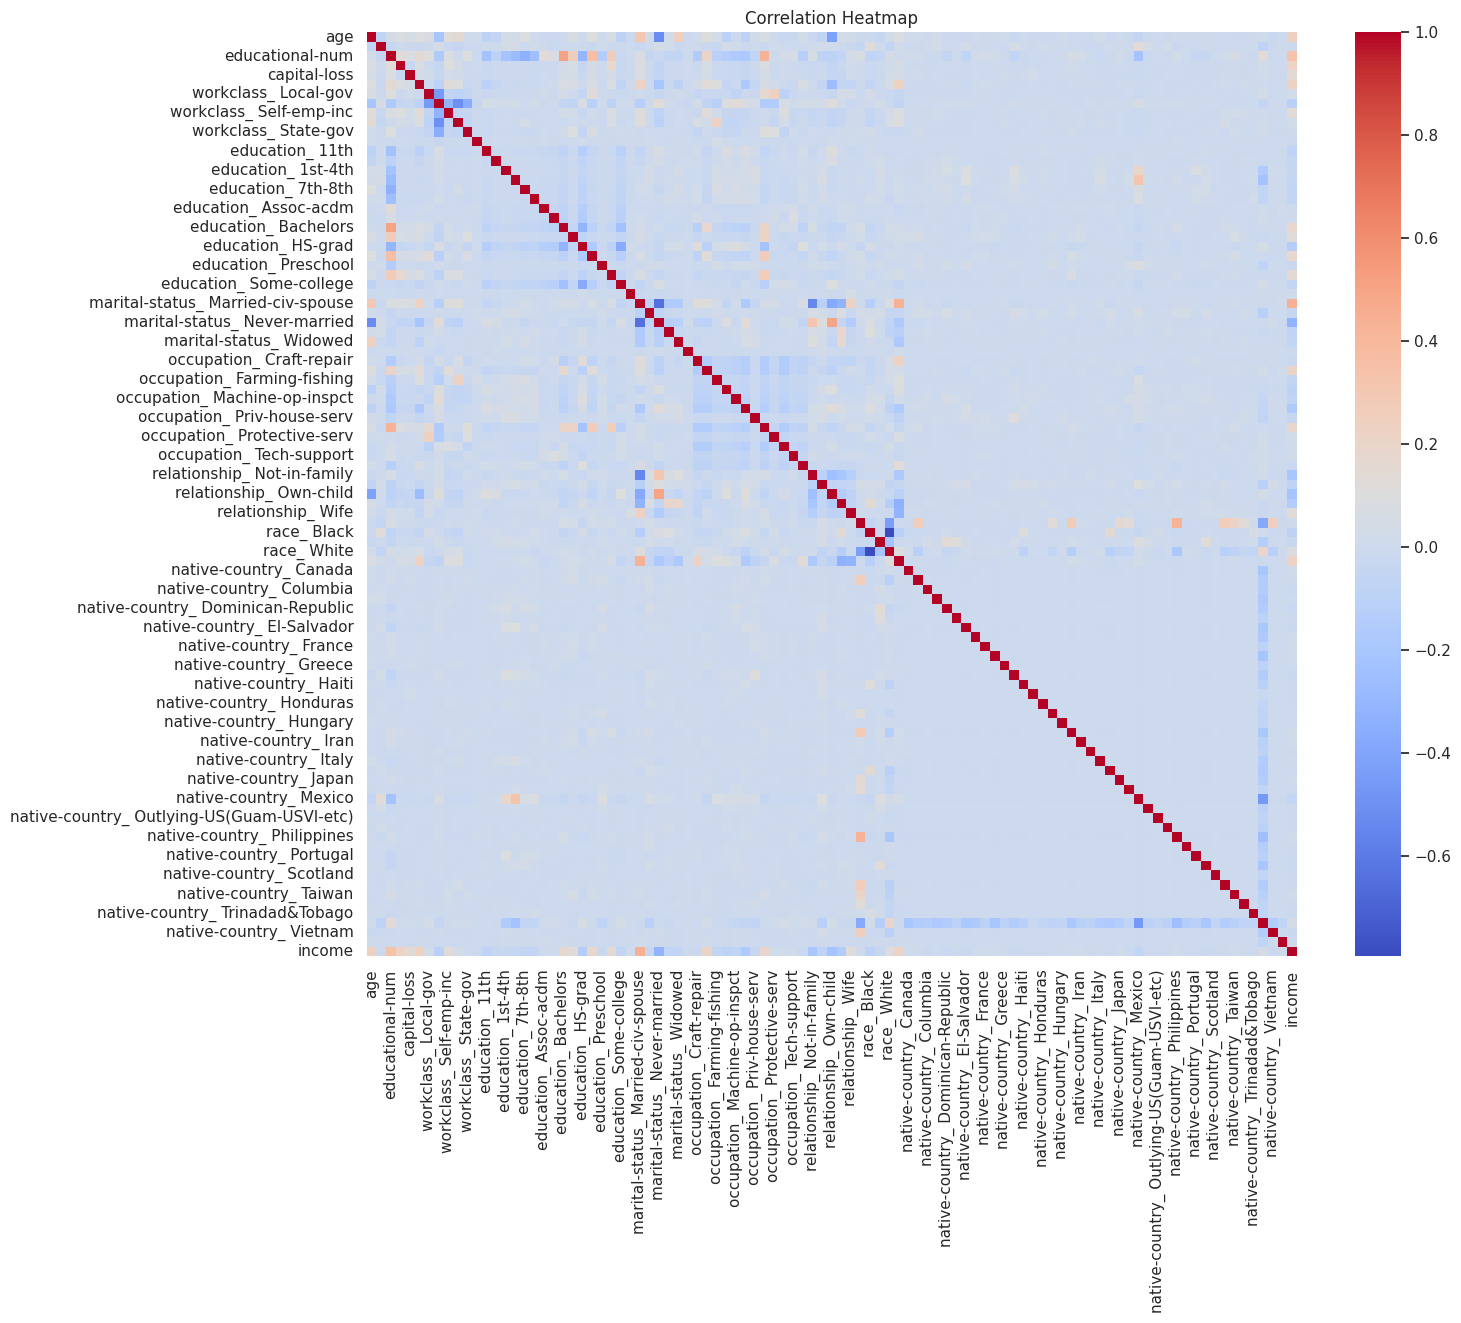

In [6]:
# --- 8. EDA (Correlation Heatmap) ---

# We need to re-add the encoded 'y' (income) to the dataframe to see its correlations
plot_df = X.copy()
plot_df['income'] = y

plt.figure(figsize=(15, 12))
sns.heatmap(plot_df.corr(), annot=False, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

# 6. Split and Scale Data

I'll split the data into training (80%) and testing (20%) sets.

Then, I'll use `StandardScaler` to scale all features. This is critical for models like Logistic Regression to perform accurately.

In [7]:
# --- 9. Split Data and Apply Scaling ---

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the data
# We fit the scaler ONLY on the training data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

print("Data successfully split and scaled.")
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")

Data successfully split and scaled.
X_train shape: (24129, 96)
X_test shape: (6033, 96)


# 7. Train and Evaluate Classification Models

I will train three different classification models to see which performs best:
* Logistic Regression
* Random Forest
* Gradient Boosting

I'll evaluate each model using its **Accuracy Score** and a **Classification Report**.

In [8]:
# --- 10. Define, Train, and Evaluate Models ---

# Define the models
models = {
    'Logistic Regression': LogisticRegression(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42)
}

# Store results
results = {}

print("--- Starting Model Training and Evaluation ---")

for name, model in models.items():
    # Train the model
    print(f"\nTraining {name}...")
    model.fit(X_train, y_train)

    # Make predictions
    y_pred = model.predict(X_test)

    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)

    # Store results
    results[name] = accuracy

    # Print results for this model
    print(f"--- Results for {name} ---")
    print(f"Accuracy: {accuracy:.4f}")
    print(classification_report(y_test, y_pred))

print("\n--- Model Comparison ---")
# Show results as a DataFrame
results_df = pd.DataFrame.from_dict(results, orient='index', columns=['Accuracy'])
results_df.sort_values(by='Accuracy', ascending=False, inplace=True)
print(results_df)

# Get the best model
best_model_name = results_df.index[0]
best_model = models[best_model_name]
print(f"\nBest Model: {best_model_name}")

--- Starting Model Training and Evaluation ---

Training Logistic Regression...
--- Results for Logistic Regression ---
Accuracy: 0.8530
              precision    recall  f1-score   support

           0       0.88      0.93      0.90      4503
           1       0.76      0.62      0.68      1530

    accuracy                           0.85      6033
   macro avg       0.82      0.78      0.79      6033
weighted avg       0.85      0.85      0.85      6033


Training Random Forest...
--- Results for Random Forest ---
Accuracy: 0.8550
              precision    recall  f1-score   support

           0       0.89      0.92      0.90      4503
           1       0.74      0.65      0.70      1530

    accuracy                           0.85      6033
   macro avg       0.82      0.79      0.80      6033
weighted avg       0.85      0.85      0.85      6033


Training Gradient Boosting...
--- Results for Gradient Boosting ---
Accuracy: 0.8671
              precision    recall  f1-score  

# 8. Save the Best Model and Scaler

The Gradient Boosting model performed the best. I'll save this trained model and the scaler to `.pkl` files. This allows them to be loaded into another application (like a web app) without needing to re-train.

In [9]:
# --- 11. Save Best Model and Scaler ---

# Get the name of the best model (which you already found)
best_model_name = results_df.index[0]
best_model = models[best_model_name]

# Save the best model
joblib.dump(best_model, 'salary_model.pkl')

# Save the scaler
joblib.dump(scaler, 'scaler.pkl')

print(f"Successfully saved the best model ({best_model_name}) to 'salary_model.pkl'")
print("Successfully saved the scaler to 'scaler.pkl'")

# --- 12. Download the Files ---
# (This part only works in Google Colab)
try:
    from google.colab import files
    print("\nDownloading files to your computer...")
    files.download('salary_model.pkl')
    files.download('scaler.pkl')
except ImportError:
    print("\nTo download, find the files in the Colab file sidebar on the left, right-click, and select 'Download'.")

Successfully saved the best model (Gradient Boosting) to 'salary_model.pkl'
Successfully saved the scaler to 'scaler.pkl'



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# 9.Create a Simpler Model for the Web App

The first model is complex (96 features). For a simple web app, I'll build a second, simpler model that uses only 5 key features. This will be easier to deploy.

In [12]:
import pandas as pd
import joblib
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# --- 1. Load the Data ---
# We already downloaded 'adult.csv'
column_names = [
    'age', 'workclass', 'fnlwgt', 'education', 'educational-num', 'marital-status',
    'occupation', 'relationship', 'race', 'gender', 'capital-gain', 'capital-loss',
    'hours-per-week', 'native-country', 'income'
]
df = pd.read_csv('adult.csv', header=None, names=column_names, na_values=' ?')

# --- 2. Select ONLY a few simple features ---
simple_features = ['age', 'educational-num', 'capital-gain', 'capital-loss', 'hours-per-week']
target = 'income'

# Create a new, simpler dataframe
simple_df = df[simple_features + [target]].copy()

# --- 3. Clean this simple data ---
simple_df.dropna(inplace=True) # Drop any rows with missing values

# --- 4. Create Simple X and y ---
X_simple = simple_df.drop(target, axis=1)
y_simple = LabelEncoder().fit_transform(simple_df[target]) # 0 for <=50K, 1 for >50K

# --- 5. Split and Scale ---
X_train_s, X_test_s, y_train_s, y_test_s = train_test_split(X_simple, y_simple, test_size=0.2, random_state=42)

# Create and fit the new, simple scaler
simple_scaler = StandardScaler()
X_train_scaled_s = simple_scaler.fit_transform(X_train_s)
X_test_scaled_s = simple_scaler.transform(X_test_s)

# --- 6. Train the Simple Model ---
print("Training simple model...")
# We use Logistic Regression. It's fast and perfect for this.
simple_model = LogisticRegression()
simple_model.fit(X_train_scaled_s, y_train_s)

# --- 7. Check Accuracy ---
y_pred_s = simple_model.predict(X_test_scaled_s)
accuracy = accuracy_score(y_test_s, y_pred_s)
print(f"Simple model accuracy: {accuracy*100:.2f}%") # Will be lower, that's OK

# --- 8. Save the NEW Model and Scaler ---
joblib.dump(simple_model, 'simple_model.pkl')
joblib.dump(simple_scaler, 'simple_scaler.pkl')

print("\nSuccessfully saved 'simple_model.pkl' and 'simple_scaler.pkl'")
print("These are now ready for your Streamlit app.")

# --- 9. Download the new files ---
try:
    from google.colab import files
    print("\nDownloading new files...")
    files.download('simple_model.pkl')
    files.download('simple_scaler.pkl')
except ImportError:
    print("\nDownload 'simple_model.pkl' and 'simple_scaler.pkl' from the sidebar.")

Training simple model...
Simple model accuracy: 81.58%

Successfully saved 'simple_model.pkl' and 'simple_scaler.pkl'
These are now ready for your Streamlit app.



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>